In [1]:
import numpy as np
import pandas as pd
import seaborn
import scipy
import random
from scipy.stats import pearsonr
import matplotlib.pyplot as plot

In [2]:
# AES S-box
Sbox = [
    0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
    0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
    0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
    0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
    0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
    0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
    0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
    0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
    0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
    0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
    0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
    0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
    0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
    0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
    0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
    0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16,
]

In [3]:
# We set the number of traces to be used to be 100
no_of_traces = 110

# Code for calculating the hamming weight of the Sbox output
def hw(int_no):
    # Write Code to calculate the number of ones in a byte...
    c = 0
    while(int_no):
        int_no &= (int_no - 1)
        c += 1
    return c

In [4]:
# Prior to reading the CSV file, the CSV file is slightly editted
# 1) Add a row to the top
# 2) Remove any samples below index 100. This ensure that we work with only 100 samples

# Read the CSV file
df = pd.read_csv("waveform.csv")

df

,Plaintext,Ciphertext,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 2492,Unnamed: 2493,Unnamed: 2494,Unnamed: 2495,Unnamed: 2496,Unnamed: 2497,Unnamed: 2498,Unnamed: 2499,Unnamed: 2500,Unnamed: 2501
0,F22E10CA18045B15EC056215AF1E2FEE,6C4A1DE1148387B5645308323C59B7D6,0.478,0.456,0.416,0.436,0.398,0.380,0.422,0.482,...,0.402,0.362,0.358,0.404,0.400,0.370,0.398,0.360,0.352,0.416
1,00A51770A9A1269514B004D1A17489BF,BFE9B87BBB844AAE58765079F672CD61,0.460,0.470,0.444,0.464,0.430,0.386,0.422,0.460,...,0.406,0.374,0.348,0.408,0.400,0.364,0.400,0.370,0.350,0.394
2,7A3B778B2CE9AC3DFFBA500F84868DE7,8E6B3D1DF403BF01CEFCAD50DD34173C,0.438,0.446,0.414,0.450,0.402,0.372,0.416,0.456,...,0.410,0.380,0.354,0.396,0.398,0.368,0.410,0.378,0.354,0.396
3,463015576F33A2BCBC991B6D37C9AFBF,E1F96AB155DC977F7DA27E1E461E2613,0.484,0.458,0.430,0.434,0.410,0.380,0.434,0.458,...,0.394,0.356,0.358,0.394,0.392,0.376,0.384,0.372,0.342,0.430
4,0F0165AA74B57F97E8A11F802732AAF9,45208B01DF3A6D9E42E0156BFC08EC24,0.472,0.470,0.444,0.456,0.406,0.396,0.426,0.450,...,0.404,0.380,0.344,0.392,0.390,0.372,0.414,0.368,0.346,0.396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,A09E044DE02F528A2BD0ECFDE5652D67,C5EE071E20F46A920964EE5D79AF1919,0.414,0.474,0.448,0.458,0.436,0.404,0.386,0.454,...,0.402,0.384,0.356,0.382,0.398,0.368,0.366,0.374,0.352,0.348
106,DF22E6F8D07C501C5D91B4C0D0F36B72,D03DF3F95500A7A8C697BC18A6250B63,0.412,0.474,0.438,0.428,0.436,0.388,0.386,0.418,...,0.418,0.376,0.354,0.386,0.410,0.388,0.364,0.386,0.358,0.358
107,7E9F5FBE2F0519A20C0963A941B91917,5C45D1E2D222289C13C3C44AB724FCD0,0.402,0.470,0.440,0.446,0.434,0.396,0.372,0.438,...,0.406,0.380,0.350,0.384,0.394,0.380,0.376,0.376,0.366,0.344
108,75583D9D56710FECB050C7786780D2EC,BE369D21F0D55E1EFD6560524454DE7B,0.430,0.488,0.452,0.452,0.426,0.394,0.398,0.438,...,0.420,0.380,0.354,0.388,0.388,0.374,0.388,0.368,0.346,0.366


In [5]:
# Extract the contents of the Plaintext and append them to an array
data_arr = df["Plaintext"].to_numpy()

len(data_arr)
data_arr[0]

'F22E10CA18045B15EC056215AF1E2FEE'

In [6]:
# Extract the 16 bytes of the plaintext and store them into a separate array
plaintext_bytes = [] # Matrix to store plaintext information
byte_array = []

base = 0

for i in range(0, 16):
    for j in range(0, len(data_arr)):
        byte_array.append(int(data_arr[j][base : (base + 2)], 16))
    plaintext_bytes.append(byte_array)  
    base = base + 2
    byte_array = []

#plaintext_bytes[1]

In [7]:
leaky_sbox_output_value_array = []
hamming_weight_of_leaky_sbox_bytes = []

no_of_possible_values_of_key_byte = 256
power_model_matrix = [[]]*no_of_possible_values_of_key_byte

power_model_matrix_16_bytes = []


In [8]:
# Calculate power model matrix for all 16 plaintext bytes
for i in range(0, 16):
    for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
        k = key_byte_guess

        leaky_sbox_output_value_array = []
        for byte_pos in range(0,no_of_traces):
            byte_now = plaintext_bytes[i][byte_pos] ^ k
            Sbox_output_leaky_value = Sbox[byte_now]
            leaky_sbox_output_value_array.append(Sbox_output_leaky_value)

        hamming_weight_of_leaky_sbox_bytes = []
        for byte in range(0,no_of_traces):
            hamming_weight_of_leaky_sbox_bytes.append(hw(leaky_sbox_output_value_array[byte]))

        power_model_matrix[key_byte_guess] = hamming_weight_of_leaky_sbox_bytes
    power_model_matrix_16_bytes.append(power_model_matrix)
    power_model_matrix = [[]]*no_of_possible_values_of_key_byte

In [9]:
#power_model_matrix_16_bytes[0]

In [10]:
correlation_matrix_16_bytes = []
correlation_matrix = []
correlation_values = []
power_trace_len = 2500

for i in range(0, 16):
    for power_trace_sample in range(0, power_trace_len):
        for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
            model_trace = power_model_matrix_16_bytes[i][key_byte_guess]
            corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + power_trace_sample))].to_numpy(), model_trace)
            correlation_values.append(corr_value[0])
        
        correlation_matrix.append(correlation_values)
        correlation_values = []
    correlation_matrix_16_bytes.append(correlation_matrix)
    correlation_matrix = []

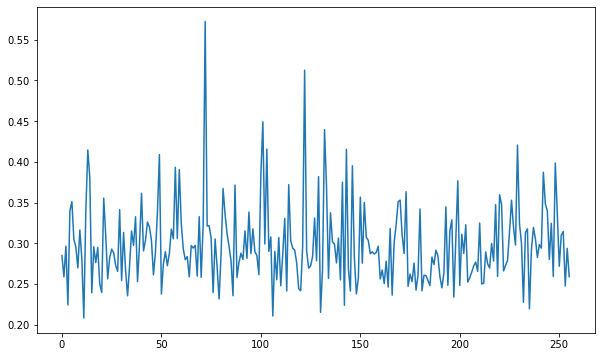

The highest correlation coefficient for key byte 0 is 0.5725063314393235 and its corresponding value is 0x48


In [11]:
byte_number = 0

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

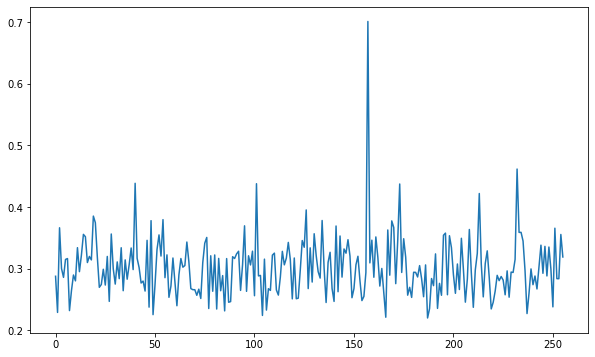

The highest correlation coefficient for key byte 1 is 0.7014632953761881 and its corresponding value is 0x9d


In [30]:
byte_number = 1

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

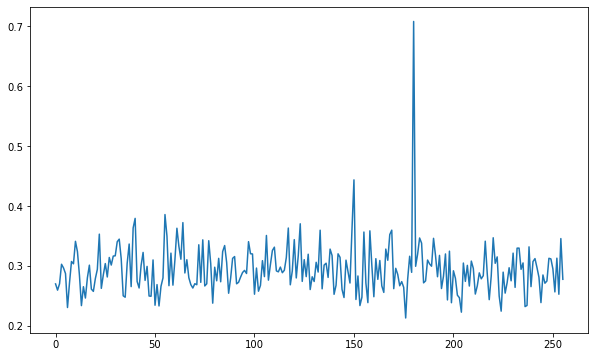

The highest correlation coefficient for key byte 2 is 0.7081874276805081 and its corresponding value is 0xb4


In [31]:
byte_number = 2

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

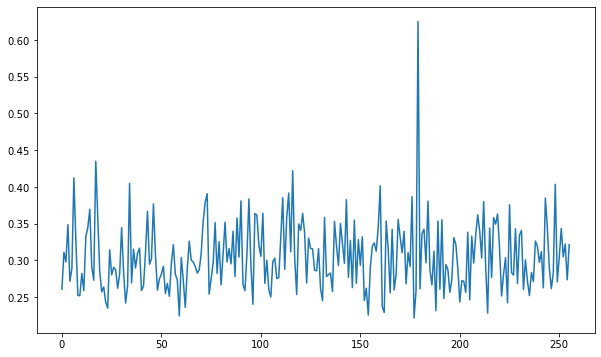

The highest correlation coefficient for key byte 3 is 0.6251981824507069 and its corresponding value is 0xb3


In [32]:
byte_number = 3

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

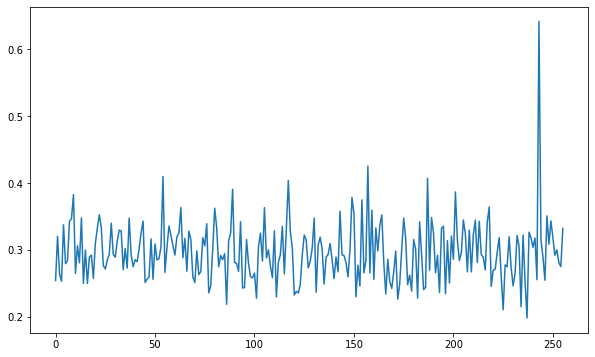

The highest correlation coefficient for key byte 4 is 0.6413699822039651 and its corresponding value is 0xf3


In [33]:
byte_number = 4

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

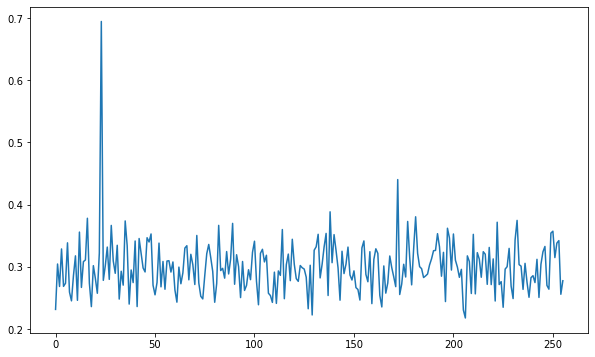

The highest correlation coefficient for key byte 5 is 0.694502001889467 and its corresponding value is 0x17


In [34]:
byte_number = 5

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

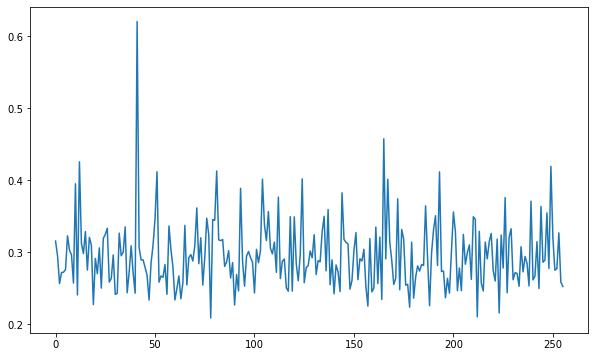

The highest correlation coefficient for key byte 6 is 0.6207291305454032 and its corresponding value is 0x29


In [35]:
byte_number = 6

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

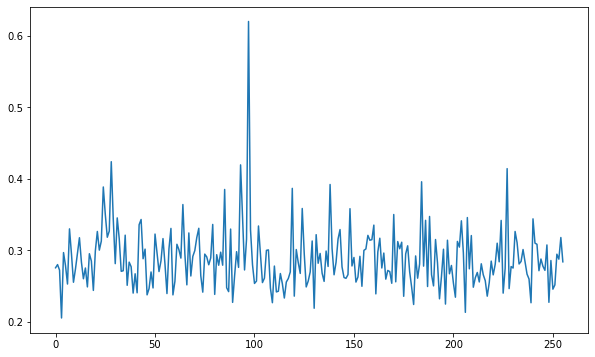

The highest correlation coefficient for key byte 7 is 0.6197514051006909 and its corresponding value is 0x61


In [36]:
byte_number = 7

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

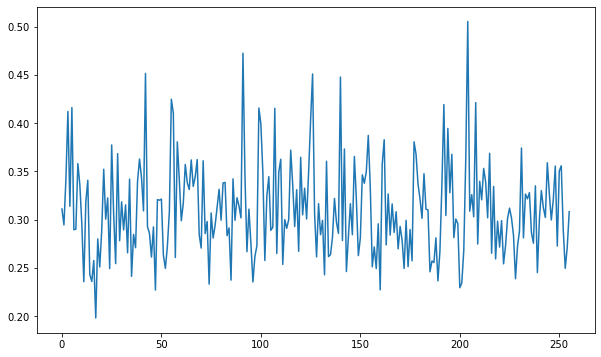

The highest correlation coefficient for key byte 8 is 0.5052991941460788 and its corresponding value is 0xcc


In [37]:
byte_number = 8

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

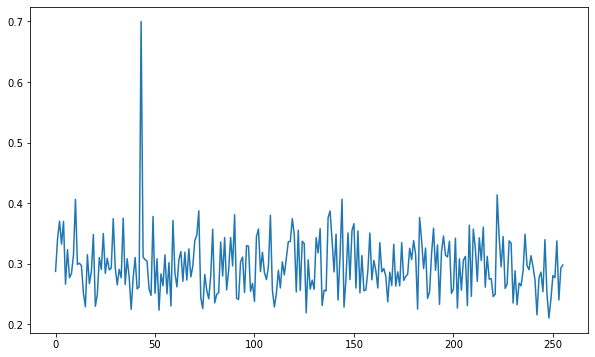

The highest correlation coefficient for key byte 9 is 0.6998306497288418 and its corresponding value is 0x2b


In [38]:
byte_number = 9

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

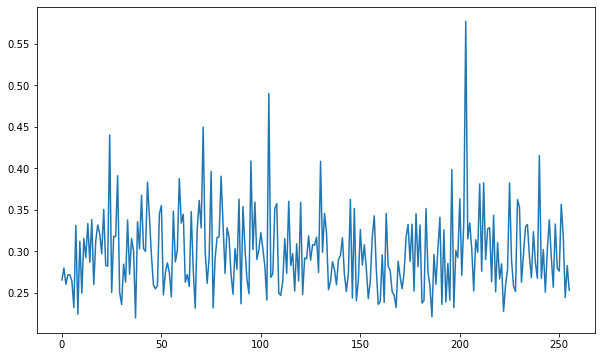

The highest correlation coefficient for key byte 10 is 0.5768388838813265 and its corresponding value is 0xcb


In [39]:
byte_number = 10

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

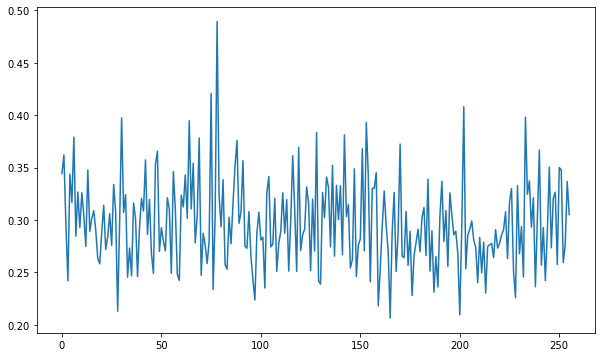

The highest correlation coefficient for key byte 11 is 0.4894392024137063 and its corresponding value is 0x4e


In [40]:
byte_number = 11

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

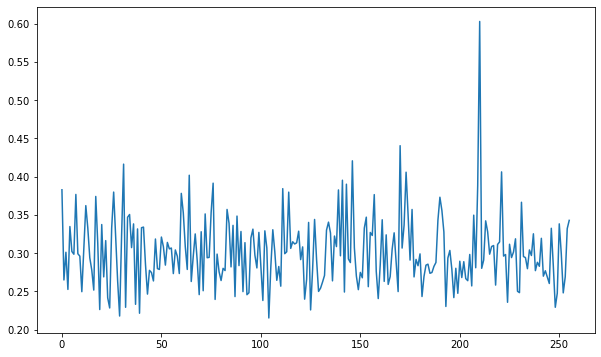

The highest correlation coefficient for key byte 12 is 0.6026759167842686 and its corresponding value is 0xd2


In [41]:
byte_number = 12

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

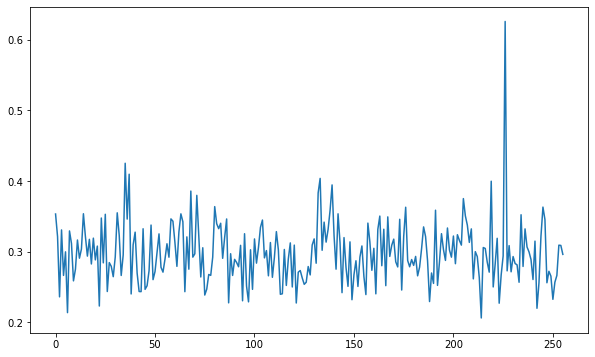

The highest correlation coefficient for key byte 13 is 0.6260018299062153 and its corresponding value is 0xe2


In [42]:
byte_number = 13

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

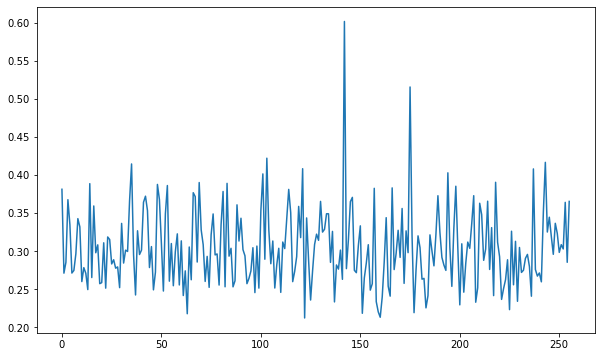

The highest correlation coefficient for key byte 14 is 0.6015484563777957 and its corresponding value is 0x8e


In [43]:
byte_number = 14

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

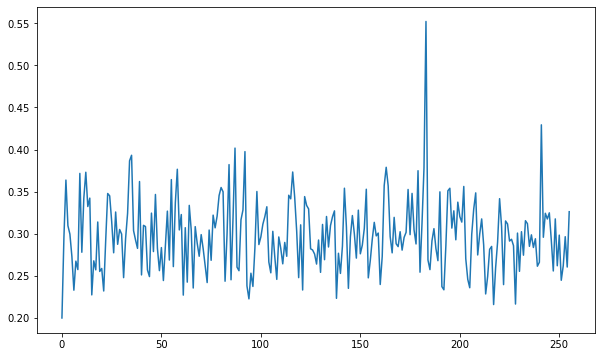

The highest correlation coefficient for key byte 15 is 0.5522224562587085 and its corresponding value is 0xb7


In [44]:
byte_number = 15

max_val = 0
highest_correlation_value_per_key = []

sample_with_highest_corr_coeff = 0
max_val2 = 0


for i in range(256):
    for j in range(2500):
        if max_val < np.abs(correlation_matrix_16_bytes[byte_number][j][i]):
            max_val = np.abs(correlation_matrix_16_bytes[byte_number][j][i])
    highest_correlation_value_per_key.append(abs(max_val))
    max_val = 0

plot.figure(figsize=(10,6))

x_index = []
for i in range(0,256):
  x_index.append(i)

plot.plot(x_index,highest_correlation_value_per_key)
plot.show()

for i in range(0, 256):
    if max_val2 < np.abs(highest_correlation_value_per_key[i]):
        max_val2 = np.abs(highest_correlation_value_per_key[i])
        sample_with_highest_corr_coeff = i
        
print(f"The highest correlation coefficient for key byte {byte_number} is {np.abs(max_val2)} and its corresponding value is {hex(sample_with_highest_corr_coeff)}")

## Additional

In [12]:
max_value = 0
sample_number = 0

for i in range (0, 16):
    for j in range(0, 2500):
        if max_value < max(correlation_matrix_16_bytes[i][j]):
            max_value = max(correlation_matrix_16_bytes[i][j])
            sample_number = j
    print(f"The highest correlation value is {max(correlation_matrix_16_bytes[i][sample_number])}, which is present at sample {sample_number} for byte {i}")
    max_value = 0
    sample_number = 0

The highest correlation value is 0.5725063314393235, which is present at sample 513 for byte 0
The highest correlation value is 0.7014632953761881, which is present at sample 2200 for byte 1
The highest correlation value is 0.7081874276805081, which is present at sample 714 for byte 2
The highest correlation value is 0.6251981824507069, which is present at sample 813 for byte 3
The highest correlation value is 0.6413699822039651, which is present at sample 913 for byte 4
The highest correlation value is 0.694502001889467, which is present at sample 2250 for byte 5
The highest correlation value is 0.6207291305454032, which is present at sample 1113 for byte 6
The highest correlation value is 0.6197514051006909, which is present at sample 1213 for byte 7
The highest correlation value is 0.5052991941460788, which is present at sample 1315 for byte 8
The highest correlation value is 0.6998306497288418, which is present at sample 2300 for byte 9
The highest correlation value is 0.5768388838

In [13]:
max_value = 0
sample_number = 0

for i in range (0, 16):
    for j in range(0, 2500):
        if max_value < max(np.abs(correlation_matrix_16_bytes[i][j])):
            max_value = max(np.abs(correlation_matrix_16_bytes[i][j]))
            sample_number = j
    print(f"The highest correlation value is {max(correlation_matrix_16_bytes[i][sample_number])}, which is present at sample {sample_number} for byte {i}")
    max_value = 0
    sample_number = 0

The highest correlation value is 0.5725063314393235, which is present at sample 513 for byte 0
The highest correlation value is 0.7014632953761881, which is present at sample 2200 for byte 1
The highest correlation value is 0.7081874276805081, which is present at sample 714 for byte 2
The highest correlation value is 0.6251981824507069, which is present at sample 813 for byte 3
The highest correlation value is 0.6413699822039651, which is present at sample 913 for byte 4
The highest correlation value is 0.694502001889467, which is present at sample 2250 for byte 5
The highest correlation value is 0.6207291305454032, which is present at sample 1113 for byte 6
The highest correlation value is 0.6197514051006909, which is present at sample 1213 for byte 7
The highest correlation value is 0.5052991941460788, which is present at sample 1315 for byte 8
The highest correlation value is 0.6998306497288418, which is present at sample 2300 for byte 9
The highest correlation value is 0.5768388838

No. of Traces: 110


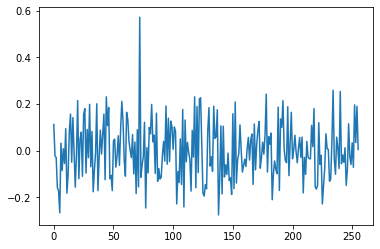

The highest correlation value is: 0.5725063314393235
The key value at which this occurs is at: 0x48


In [14]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[0][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[0]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


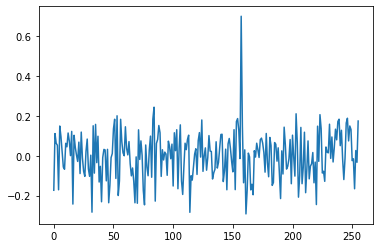

The highest correlation value is: 0.7014632953761881
The key value at which this occurs is at: 0x9d


In [15]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[1][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[1]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


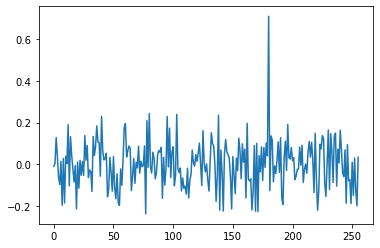

The highest correlation value is: 0.7081874276805081
The key value at which this occurs is at: 0xb4


In [16]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[2][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[2]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


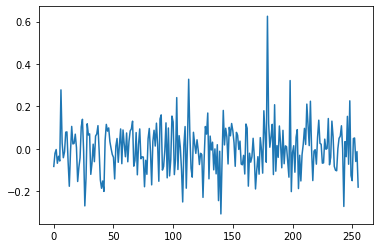

The highest correlation value is: 0.6251981824507069
The key value at which this occurs is at: 0xb3


In [17]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[3][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[3]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


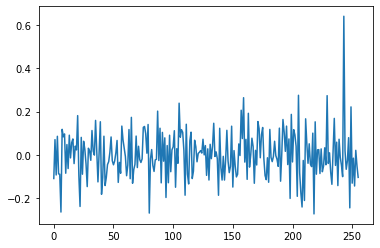

The highest correlation value is: 0.6413699822039651
The key value at which this occurs is at: 0xf3


In [18]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[4][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[4]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


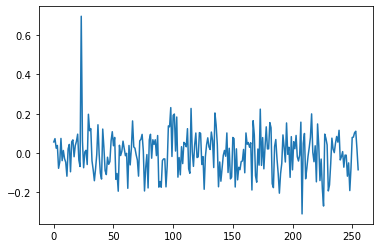

The highest correlation value is: 0.694502001889467
The key value at which this occurs is at: 0x17


In [19]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[5][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[5]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


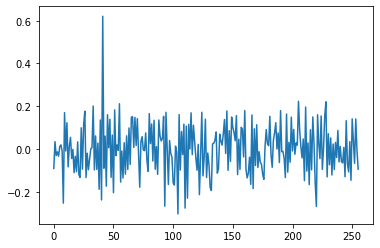

The highest correlation value is: 0.6207291305454032
The key value at which this occurs is at: 0x29


In [20]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[6][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[6]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


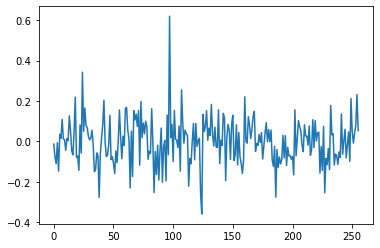

The highest correlation value is: 0.6197514051006909
The key value at which this occurs is at: 0x61


In [21]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[7][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[7]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


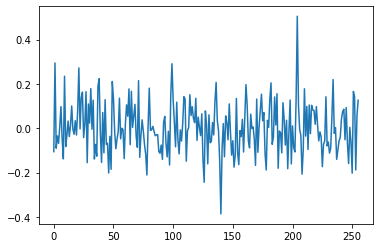

The highest correlation value is: 0.5052991941460788
The key value at which this occurs is at: 0xcc


In [22]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]

correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[8][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[8]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


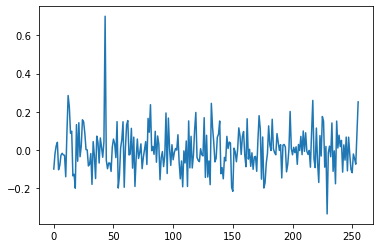

The highest correlation value is: 0.6998306497288418
The key value at which this occurs is at: 0x2b


In [23]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[9][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[9]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


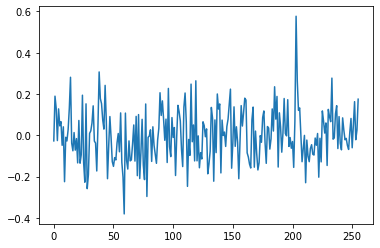

The highest correlation value is: 0.5768388838813265
The key value at which this occurs is at: 0xcb


In [24]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[10][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[10]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


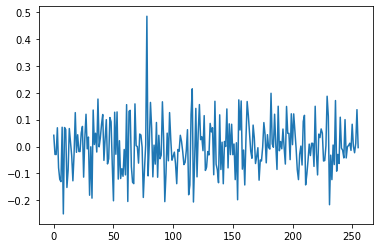

The highest correlation value is: 0.4838943820621895
The key value at which this occurs is at: 0x4e


In [25]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[11][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[11]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


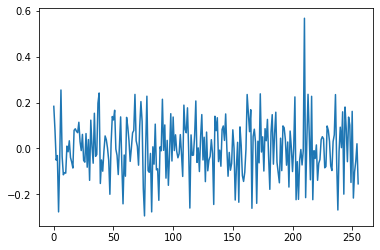

The highest correlation value is: 0.5677707900703463
The key value at which this occurs is at: 0xd2


In [26]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[12][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[12]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


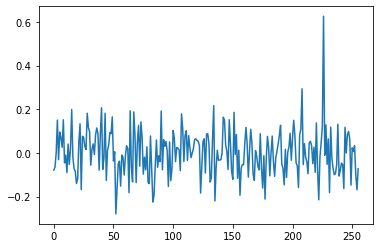

The highest correlation value is: 0.6260018299062153
The key value at which this occurs is at: 0xe2


In [27]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[13][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[13]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


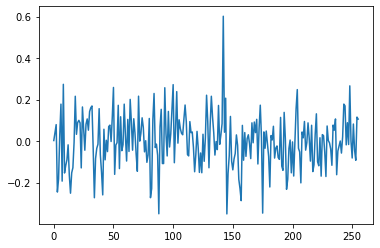

The highest correlation value is: 0.6015484563777957
The key value at which this occurs is at: 0x8e


In [28]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[14][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[14]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")

No. of Traces: 110


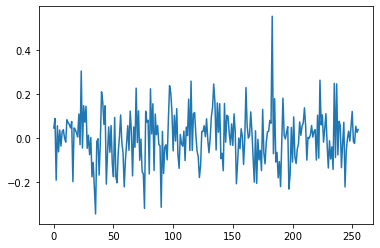

The highest correlation value is: 0.5522224562587085
The key value at which this occurs is at: 0xb7


In [29]:
sample_number_16_bytes= [513, 2200, 714, 813, 913, 2250, 1113, 1213, 1315, 2300, 1514, 1613, 1715, 1814, 1913, 2014]
correlation_values = []

for key_byte_guess in range(0,no_of_possible_values_of_key_byte):
    model_trace = power_model_matrix_16_bytes[15][key_byte_guess]
    corr_value = scipy.stats.pearsonr(df["Unnamed: {x}".format(x=str(2 + sample_number_16_bytes[15]))].to_numpy(), model_trace)
    correlation_values.append(corr_value[0])

#Here, we are sorting the correlation values and identifying which key byte has the largest correlation for 1 sample
sorting_order = np.argsort(correlation_values)
sorting_order = sorting_order[::-1]

#rank_of_correct_key_byte = np.where(sorting_order == correct_key_byte)

print("No. of Traces: {}".format(no_of_traces))
#print("Rank of Correct Key Byte: {}".format(rank_of_correct_key_byte[0]+1))

plot.figure(1)

x_index = []
for i in range(0,no_of_possible_values_of_key_byte):
  x_index.append(i)

plot.plot(x_index,correlation_values)
plot.show()


print(f"The highest correlation value is: {max(correlation_values)}")
print(f"The key value at which this occurs is at: {hex(correlation_values.index(max(correlation_values)))}")